In [41]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

## Experimenting with Erdos-Renyi random graphs

In [42]:
er = nx.erdos_renyi_graph(500,0.15)

In [43]:
print "Number of nodes in the random graph: ", er.number_of_nodes() 
print "Number of edges in the random graph: ", er.number_of_edges() 

Number of nodes in the random graph:  500
Number of edges in the random graph:  18742


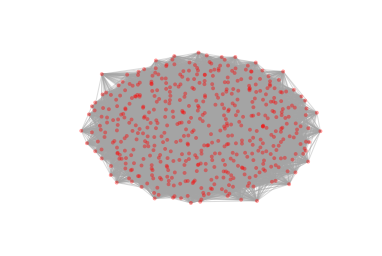

In [44]:
plt.Figure(figsize=(12, 8))
plt.axis('off')
nx.draw_networkx(er, node_size=15, edge_color='#a4a4a4', with_labels=False, alpha=.4, linewidths=0)

### Degree distribution

In [45]:
degree_sequence=sorted(nx.degree(er).values(),reverse=True) 
dmax=max(degree_sequence)
print dmax

102


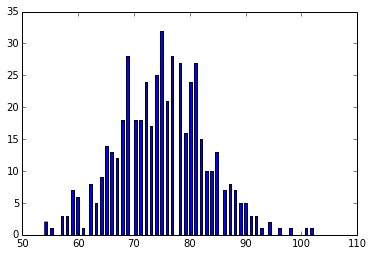

In [46]:
h,bins,patches = plt.hist(degree_sequence,bins=dmax)

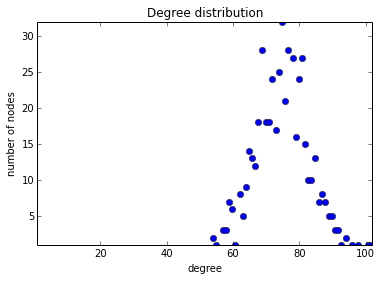

In [47]:
hmax=max(h)
plt.axis([1,dmax,1,hmax]) # set ranges
x=bins.compress(h)
y=h.compress(h)
plt.plot(x,y,'bo')
plt.title("Degree distribution")
plt.xlabel("degree")
plt.ylabel("number of nodes")

Two nodes of a graph belong in the same connected component if there is a path of edges of the graph that connects these two nodes.

In [48]:
cc= nx.connected_components(er)
print type(cc)
print [len(s) for s in cc]

<type 'generator'>
[500]


The clustering coefficient of a node is defined as the number of possible triangles centered in this node, divided by the total number of possible triangles in which this node can participate in. Formally, the clustering coefficient of a node _u_ is defined as

$c_u = \frac{2T(u)}{d(u)(d(u) - 1)}$,

where _T(u)_ is the number of triangles through node _u_ and _d(u)_ is the degree of node _u_.

In [49]:
ccall = nx.clustering(er)
clustering_coefficient = nx.average_clustering(er)

print clustering_coefficient

0.150125018307


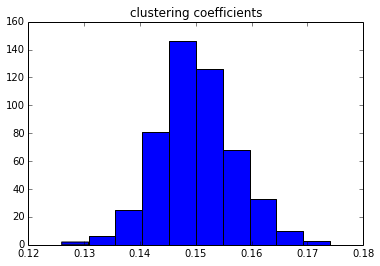

In [50]:
h,bins,patches = plt.hist(list(nx.clustering(er).values()))
plt.title('clustering coefficients')

### Triangles

419


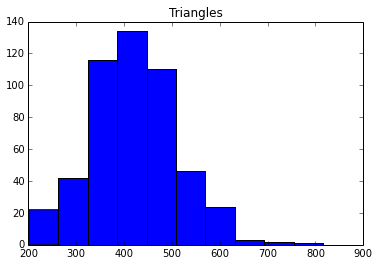

In [51]:
print(nx.triangles(er,0))
#print(nx.triangles(er))
h,bins, patches = plt.hist(list(nx.triangles(er).values()))
plt.title('Triangles')

## Diameter

The diameter of a graph is defined as the largest shortest path between any two nodes in the graph

In [52]:
print(nx.diameter(er))

3


In [53]:
print(nx.average_shortest_path_length(er))

1.84977955912


## PageRank

In [54]:
nx.pagerank(er)

{0: 0.0020529549745503923,
 1: 0.002359982084353981,
 2: 0.0017040364116607093,
 3: 0.0020456496217338676,
 4: 0.0021864102675318528,
 5: 0.001996200865791211,
 6: 0.002135610257315217,
 7: 0.0019150166446116616,
 8: 0.0021051642664931132,
 9: 0.0020021539842240265,
 10: 0.001519971295865176,
 11: 0.0022924402954103084,
 12: 0.0016135034955716107,
 13: 0.002256204493769969,
 14: 0.001973720986012429,
 15: 0.0017772468809024759,
 16: 0.001976655352058676,
 17: 0.0018661181533380677,
 18: 0.001957921382050322,
 19: 0.002270880605333729,
 20: 0.0018849279085389168,
 21: 0.0020666195110280437,
 22: 0.002027613106413037,
 23: 0.0018619295003525877,
 24: 0.0021339519594148226,
 25: 0.002183835898712654,
 26: 0.0016629214170158027,
 27: 0.0018156854365560767,
 28: 0.0020740362833119937,
 29: 0.0016402495188369383,
 30: 0.0019118019642767803,
 31: 0.002116659961318599,
 32: 0.002086680110908136,
 33: 0.0017989019965875598,
 34: 0.0024130806721633525,
 35: 0.0019731324489638572,
 36: 0.00181801

In [57]:
sorted([(value,key) for (key,value) in nx.pagerank(er).items()], reverse=True)

[(0.00260643114403912, 459),
 (0.002591935744840589, 162),
 (0.0025194200428047438, 378),
 (0.002476561359664744, 356),
 (0.002432923482305868, 212),
 (0.0024312508136938677, 329),
 (0.0024130806721633525, 34),
 (0.0023919968316226644, 48),
 (0.002386817235549888, 117),
 (0.00238374271068058, 265),
 (0.002369062775960896, 123),
 (0.0023649942142702565, 167),
 (0.002359982084353981, 1),
 (0.002345724389452243, 188),
 (0.002339085596175788, 58),
 (0.0023388315092137814, 493),
 (0.0023371987545861253, 336),
 (0.0023362948241070977, 178),
 (0.0023237915221249144, 275),
 (0.002322309386276247, 65),
 (0.0023199937947393097, 442),
 (0.0023199251403030314, 217),
 (0.0023187608253599132, 498),
 (0.00229587339265969, 443),
 (0.0022958226134737565, 172),
 (0.0022942844388319544, 80),
 (0.0022924402954103084, 11),
 (0.0022921971465502547, 141),
 (0.0022919764902083863, 53),
 (0.0022916172301735978, 279),
 (0.0022761329250862504, 128),
 (0.0022731240636775798, 348),
 (0.002270880605333729, 19),
 (0

## NetworkX-METIS

Webpage = https://github.com/networkx/networkx-metis

In [32]:
import nxmetis

In [40]:
for i in nxmetis.partition(er, 10)[1]:
    print i

[6, 21, 32, 33, 39, 43, 57, 68, 69, 71, 77, 99, 103, 105, 115, 138, 149, 154, 158, 161, 165, 168, 181, 184, 187, 210, 211, 228, 237, 244, 270, 284, 292, 299, 305, 318, 319, 335, 348, 358, 372, 374, 382, 401, 402, 407, 433, 468, 491, 493, 495]
[19, 22, 24, 47, 48, 52, 60, 62, 63, 65, 73, 97, 113, 178, 179, 188, 191, 199, 202, 206, 214, 219, 230, 241, 278, 288, 324, 334, 350, 351, 354, 356, 365, 366, 367, 376, 377, 385, 393, 394, 411, 415, 426, 458, 463, 465, 475, 483, 496, 499]
[12, 26, 27, 40, 42, 50, 58, 72, 112, 123, 128, 129, 135, 153, 155, 159, 160, 186, 205, 209, 213, 220, 222, 238, 243, 253, 254, 269, 274, 277, 281, 294, 296, 308, 321, 364, 368, 379, 383, 384, 386, 388, 396, 406, 423, 434, 443, 445, 454, 466, 487]
[1, 4, 44, 46, 51, 54, 55, 87, 92, 101, 119, 120, 152, 157, 162, 166, 169, 201, 227, 240, 250, 251, 252, 264, 275, 276, 311, 320, 332, 338, 339, 349, 357, 370, 403, 409, 413, 414, 417, 422, 431, 440, 444, 447, 455, 472, 474, 476, 480, 498]
[0, 10, 31, 34, 49, 53, 61, 85